In [2]:
from stock_scraper import get_stock_prices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
PAIRS = [("CLGX", "JKHY"), ("DST", "FTNT"), ("MDLZ", "KHC"), ("AEL", "LNC"), ("TEX", "AGCO"), ("HIG", "BRK-B"),
         ("ASGN", "MAN"), ("BDX", "WST"), ("SHAK", "SONC"), ("CIEN", "JNPR")]


START_DATE = "2014-01-01"
START_TRAINING_DATE = "2016-01-01"
START_TESTING_DATE = "2017-01-01"
END_TESTING_DATE = "2018-01-01"

In [4]:
RESIDUALS = dict()
for pair in PAIRS:
    prices = get_stock_prices(pair, START_DATE, END_TESTING_DATE)['Adj Close']
    log_prices = np.log(prices)
    residual = log_prices[pair[0]] - log_prices[pair[1]]
    RESIDUALS[pair] = residual

Succeeded in 1.97s after 1 attempts
Succeeded in 3.11s after 2 attempts
Succeeded in 3.85s after 3 attempts
Succeeded in 1.74s after 1 attempts
Succeeded in 2.01s after 1 attempts
Succeeded in 3.25s after 2 attempts
Succeeded in 1.69s after 1 attempts
Succeeded in 1.78s after 1 attempts
Succeeded in 1.50s after 1 attempts
Succeeded in 3.25s after 2 attempts


In [5]:
def zonify(series, ma_lookback, sd_lookback, zone_width = 0.75):
    ma_series = series.rolling(window=ma_lookback, center=False).mean()
    sd_series = series.rolling(window=sd_lookback, center=False).std()
    z_scores = (series - ma_series) / sd_series
    continuous_buckets = z_scores / zone_width
    
    # np.floor floors to -inf, so floor instead the absolute values and then multiply by the sign of the numbers
    buckets = np.floor(np.abs(continuous_buckets)) * (continuous_buckets / np.abs(continuous_buckets))
    return buckets

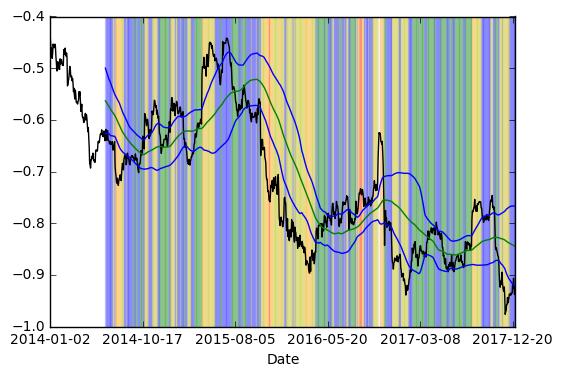

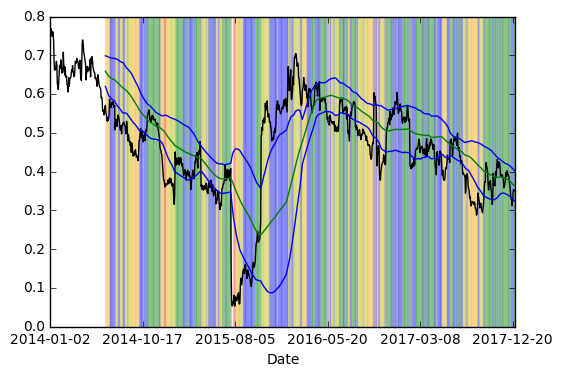

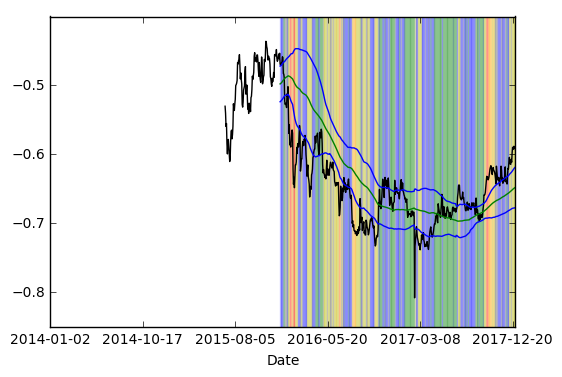

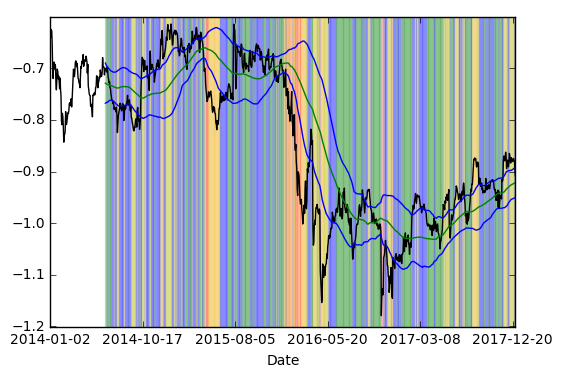

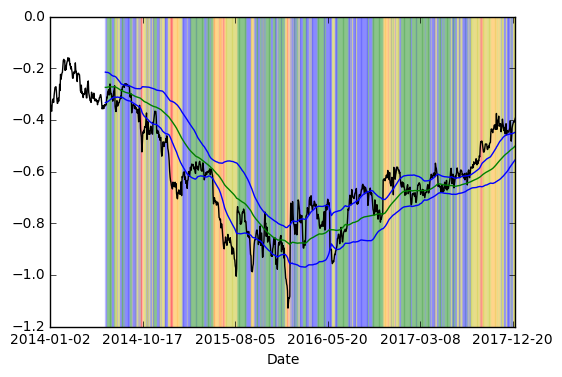

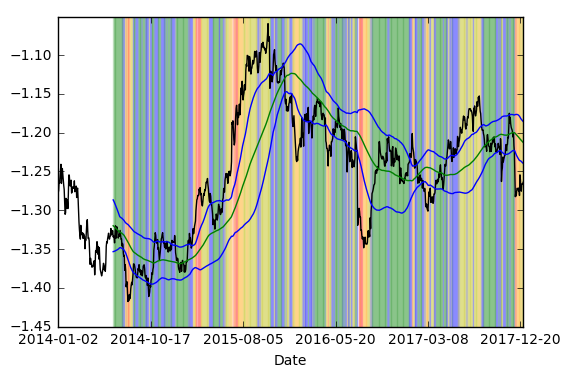

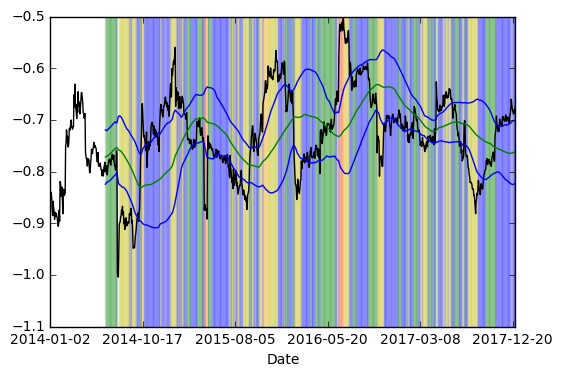

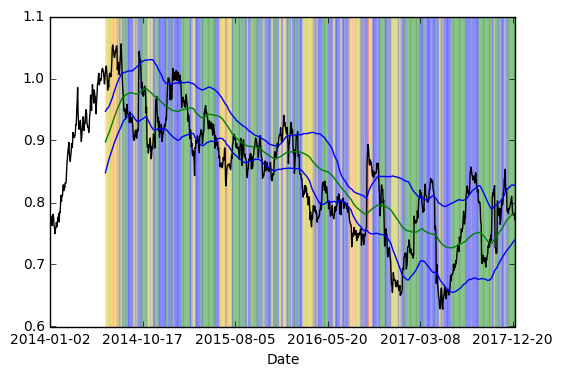

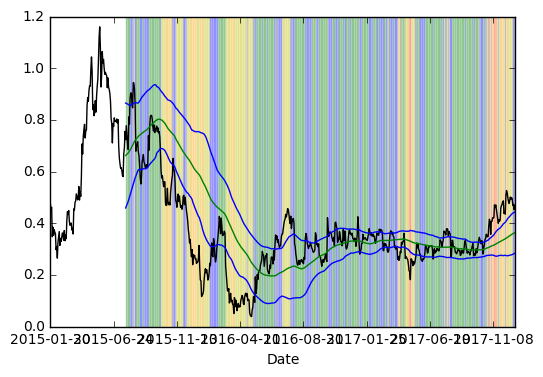

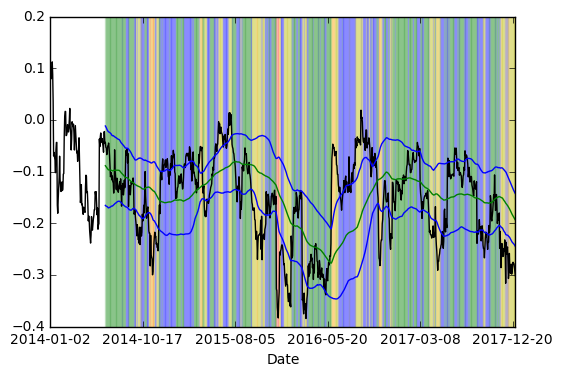

In [6]:
MA_LOOKBACK = 120
SD_LOOKBACK = 90

for i in range(len(PAIRS)):
    plt.figure(i)
    pair = PAIRS[i]
    
    zonified = zonify(RESIDUALS[pair], ma_lookback=MA_LOOKBACK, sd_lookback=SD_LOOKBACK)
    residual = RESIDUALS[pair]
    residual.plot(color='black')
    ma = residual.rolling(window=MA_LOOKBACK, center=False).mean()
    sd = residual.rolling(window=SD_LOOKBACK, center=False).std()
    ma.plot(color='g')
    (ma+sd).plot(color='b')
    (ma-sd).plot(color='b')


    colors = {0.0:'g', 1.0:'b', 2.0: 'y', 3.0: 'orange', 4.0: 'r'}
    for i in range(len(zonified.index)):
        abs_zone = np.abs(zonified.iloc[i])
        if abs_zone in colors:
            color = colors[abs_zone]
            plt.axvspan(i, i, alpha=0.2, color=color)

In [12]:
zonify(RESIDUALS[PAIRS[0]], ma_lookback=MA_LOOKBACK, sd_lookback=SD_LOOKBACK)[300:]

Date
2015-03-13   -2.0
2015-03-16   -2.0
2015-03-17   -2.0
2015-03-18   -2.0
2015-03-19   -1.0
2015-03-20   -1.0
2015-03-23   -1.0
2015-03-24   -1.0
2015-03-25   -1.0
2015-03-26   -1.0
2015-03-27   -1.0
2015-03-30   -0.0
2015-03-31   -0.0
2015-04-01   -0.0
2015-04-02   -0.0
2015-04-06   -0.0
2015-04-07   -0.0
2015-04-08   -0.0
2015-04-09    0.0
2015-04-10    0.0
2015-04-13    0.0
2015-04-14    0.0
2015-04-15    0.0
2015-04-16    0.0
2015-04-17    0.0
2015-04-20    0.0
2015-04-21    0.0
2015-04-22    0.0
2015-04-23    3.0
2015-04-24    3.0
             ... 
2017-11-16   -1.0
2017-11-17   -2.0
2017-11-20   -2.0
2017-11-21   -2.0
2017-11-22   -2.0
2017-11-24   -2.0
2017-11-27   -2.0
2017-11-28   -3.0
2017-11-29   -3.0
2017-11-30   -2.0
2017-12-01   -2.0
2017-12-04   -2.0
2017-12-05   -2.0
2017-12-06   -2.0
2017-12-07   -2.0
2017-12-08   -2.0
2017-12-11   -1.0
2017-12-12   -1.0
2017-12-13   -1.0
2017-12-14   -1.0
2017-12-15   -1.0
2017-12-18   -1.0
2017-12-19   -1.0
2017-12-20   -1.0
2017-